# Predicción de partidos de fútbol

In [298]:
import pandas as pd
import os

os.chdir("C:/Users/Sandra/Downloads")
# Cargar el archivo Excel en un DataFrame de pandas
data = pd.read_excel('datos_definitivos.xlsx')

print(data.head())


    Season       Date    HomeTeam     AwayTeam  PartidoSeason  ELOHomeT  \
0  2019-20 2019-08-16  Ath Bilbao    Barcelona              1         0   
1  2019-20 2019-08-17       Celta  Real Madrid              1         0   
2  2019-20 2019-08-17    Valencia     Sociedad              1         0   
3  2019-20 2019-08-17    Mallorca        Eibar              1         0   
4  2019-20 2019-08-17     Leganes      Osasuna              1         0   

   ELOHomeM  ELOAwayT  ELOAwayM  AtaqueMedioH  AtaqueMedioA  TarjetasRMedioH  \
0         0         0         0           0.0           0.0              0.0   
1         0         0         0           0.0           0.0              0.0   
2         0         0         0           0.0           0.0              0.0   
3         0         0         0           0.0           0.0              0.0   
4         0         0         0           0.0           0.0              0.0   

   TarjetasRMedioA Resultado  
0              0.0         H  
1     

Season       Date    HomeTeam     AwayTeam  PartidoSeason  ELOHomeT  \
0     2019-20 2019-08-16  Ath Bilbao    Barcelona              1         0   
1     2019-20 2019-08-17       Celta  Real Madrid              1         0   
2     2019-20 2019-08-17    Valencia     Sociedad              1         0   
3     2019-20 2019-08-17    Mallorca        Eibar              1         0   
4     2019-20 2019-08-17     Leganes      Osasuna              1         0   
...       ...        ...         ...          ...            ...       ...   
1594  2023-24 2023-10-01     Almeria      Granada              5        -3   
1595  2023-24 2023-10-01      Alaves      Osasuna              4         1   
1596  2023-24 2023-10-01  Ath Madrid        Cadiz              3         2   
1597  2023-24 2023-10-01       Betis     Valencia              4         1   
1598  2023-24 2023-10-02  Las Palmas        Celta              4         1   

      ELOHomeM  ELOAwayT  ELOAwayM  AtaqueMedioH  AtaqueMedioA  \
0            0         0         0      0.000000      0.000000   
1            0         0         0      0.000000      0.000000   
2            0         0         0      0.000000      0.000000   
3            0         0         0      0.000000      0.000000   
4            0         0         0      0.000000      0.000000   
...        ...       ...       ...           ...           ...   
1594        -3        -3        -2      1.250000      1.333333   
1595         0         1         2      1.666667      2.000000   
1596         2        -2         1      3.000000      0.333333   
1597        -1         0         0      0.666667      1.333333   
1598         1         0         1      0.666667      2.000000   

      TarjetasRMedioH  TarjetasRMedioA Resultado  
0            0.000000              0.0         H  
1            0.000000              0.0         A  
2            0.000000              0.0         D  
3            0.000000              0.0         H  
4            0.000000              0.0         A  
...               ...              ...       ...  
1594         0.000000              0.0         D  
1595         0.000000              0.0         A  
1596         0.000000              0.0         H  
1597         0.000000              0.0         H  
1598         0.333333              0.0         H  

[1599 rows x 14 columns]

## 1. EDA

In [2]:
print(f'Cantidad de filas y columnas: {data.shape}')
print('Nombre columnas:',data.columns)

print('tipos de dato:',data.dtypes)
print(data.describe())

Cantidad de filas y columnas: (1599, 14)
Nombre columnas: Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'PartidoSeason', 'ELOHomeT',
       'ELOHomeM', 'ELOAwayT', 'ELOAwayM', 'AtaqueMedioH', 'AtaqueMedioA',
       'TarjetasRMedioH', 'TarjetasRMedioA', 'Resultado'],
      dtype='object')
tipos de dato: Season                     object
Date               datetime64[ns]
HomeTeam                   object
AwayTeam                   object
PartidoSeason               int64
ELOHomeT                    int64
ELOHomeM                    int64
ELOAwayT                    int64
ELOAwayM                    int64
AtaqueMedioH              float64
AtaqueMedioA              float64
TarjetasRMedioH           float64
TarjetasRMedioA           float64
Resultado                  object
dtype: object
                                Date  PartidoSeason     ELOHomeT     ELOHomeM  \
count                           1599    1599.000000  1599.000000  1599.000000   
mean   2021-08-27 12:29:16.097560832     

In [3]:
valores_faltantes = data.isnull().sum()
valores_faltantes_porcentaje = 100*valores_faltantes/len(data)

valores_faltantes_df = pd.DataFrame({'count': valores_faltantes, 'percent': valores_faltantes_porcentaje})
valores_faltantes_df.sort_values('percent', ascending=False)

count  percent
Season               0      0.0
Date                 0      0.0
HomeTeam             0      0.0
AwayTeam             0      0.0
PartidoSeason        0      0.0
ELOHomeT             0      0.0
ELOHomeM             0      0.0
ELOAwayT             0      0.0
ELOAwayM             0      0.0
AtaqueMedioH         0      0.0
AtaqueMedioA         0      0.0
TarjetasRMedioH      0      0.0
TarjetasRMedioA      0      0.0
Resultado            0      0.0

In [290]:
# Codificar la variable respuesta
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Resultado'] = label_encoder.fit_transform(data['Resultado'])

In [295]:
X = data.drop(['PartidoSeason','Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'], axis=1)
y = data['Resultado']

In [12]:
#!pip install timeseries-cv
from sklearn.model_selection import TimeSeriesSplit

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False) #importa no hacerlo de manera aleatoria

In [297]:
print(y_test)

1199    A
1200    H
1201    D
1202    A
1203    A
       ..
1594    D
1595    A
1596    H
1597    H
1598    H
Name: Resultado, Length: 400, dtype: object


## 2. Árboles de decisión

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

Si solo lo hago para el accuracy

In [9]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 10],
}

In [10]:
dt_clf = DecisionTreeClassifier()

In [11]:
# GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10),
                           scoring='accuracy', n_jobs=-1)

In [12]:
import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [14]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [15]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar el tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 34.01 segundos


In [16]:
best_dt = grid_search.best_estimator_

In [17]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")


Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión del modelo en el conjunto de entrenamiento: 0.4929


In [18]:
y_pred = best_dt.predict(X_test)
y_pred_prob = best_dt.predict_proba(X_test)  # Probabilidades para AUC

In [19]:
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

Precisión del modelo en el conjunto de prueba: 46.75%
Precisión (Precision) en el conjunto de prueba: 33.52%
Recuperación (Recall) en el conjunto de prueba: 46.75%
F1-score en el conjunto de prueba: 38.36%
AUC en el conjunto de prueba: 57.58%


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[ 32   0  78]
 [ 27   0  73]
 [ 34   1 155]]


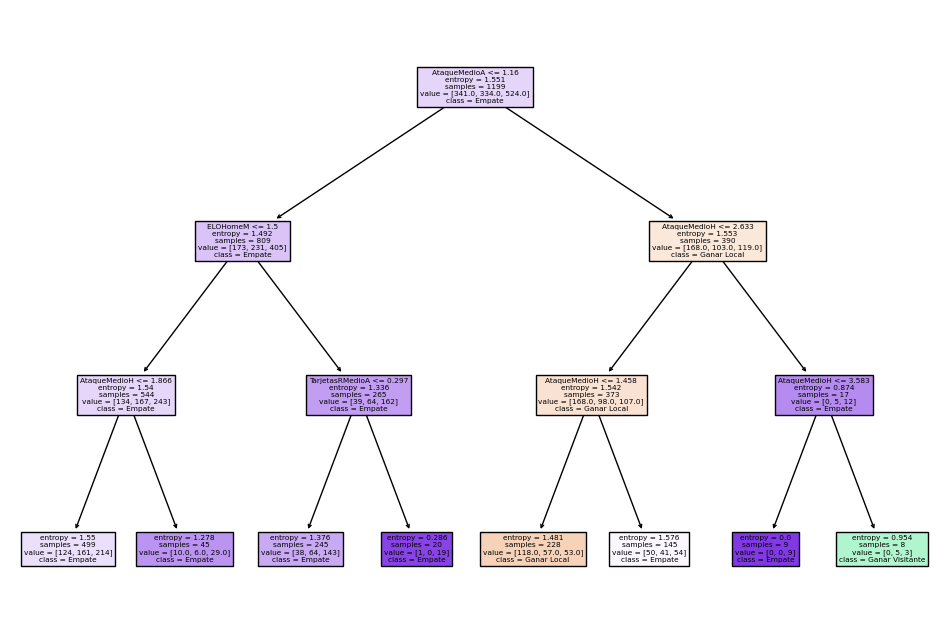

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

best_dt.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=X_train.columns, class_names=['Ganar Local', 'Ganar Visitante', 'Empate'], filled=True)
plt.show()


## Random Forest

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 10],
}

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [29]:
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10),
                           scoring='accuracy', n_jobs=-1)

In [30]:
import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [31]:
# GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [32]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [227]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 344.76 segundos


In [33]:
# mejor modelo
best_rf = grid_search.best_estimator_

In [34]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_rf.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Precisión del modelo en el conjunto de entrenamiento: 0.5371


In [35]:
# Realiza predicciones
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)  # Probabilidades para AUC

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

Precisión del modelo en el conjunto de prueba: 48.00%
Precisión (Precision) en el conjunto de prueba: 40.23%
Recuperación (Recall) en el conjunto de prueba: 48.00%
F1-score en el conjunto de prueba: 41.66%
AUC en el conjunto de prueba: 60.17%


In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[ 46   3  61]
 [ 28   2  70]
 [ 39   7 144]]


In [38]:
# Obtener las probabilidades predichas para el conjunto de prueba
y_proba_rf = best_rf.predict_proba(X_test)
print(y_proba_rf)

[[0.48376895 0.188997   0.32723406]
 [0.19512053 0.3055319  0.49934757]
 [0.41504063 0.29481215 0.29014722]
 ...
 [0.13007309 0.28721963 0.58270728]
 [0.40868358 0.26627613 0.32504029]
 [0.43113306 0.25663408 0.31223286]]


## Regresion logistica

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [234]:
param_grid = {'penalty': [None],
              'C': [1]}

In [235]:
lr_clf = LogisticRegression(max_iter=1000, random_state=123)
grid_search = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10),
                           scoring='accuracy', n_jobs=-1)

In [236]:
import time
# Guardar e l tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [237]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=LogisticRegression(max_iter=1000, random_state=123),
             n_jobs=-1, param_grid={'C': [1], 'penalty': [None]},
             scoring='accuracy')

In [238]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [239]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 2.49 segundos


In [240]:
best_lr = grid_search.best_estimator_
print("Mejor parámetro C encontrado:", grid_search.best_params_)
accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejor parámetro C encontrado: {'C': 1, 'penalty': None}
Precisión del modelo en el conjunto de entrenamiento: 0.4929


In [241]:
y_pred = best_lr.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)  # Probabilidades para AUC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Precisión del modelo en el conjunto de prueba: 49.75%
Precisión (Precision) en el conjunto de prueba: 45.07%
Recuperación (Recall) en el conjunto de prueba: 49.75%
F1-score en el conjunto de prueba: 42.14%
AUC en el conjunto de prueba: 60.73%
Matriz de confusión:
[[ 45   1  64]
 [ 22   1  77]
 [ 36   1 153]]


## 5. SVM
1º kernel lineal

In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [259]:
param_grid = {
    'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'kernel': ['linear']
}

In [260]:
svm_model = SVC()

In [261]:
grid_search_accur = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=4), scoring='accuracy')
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=4), scoring='accuracy')

In [262]:
import time
# Guardar e l tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [263]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=SVC(),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'kernel': ['linear']},
             scoring='accuracy')

In [264]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [265]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 95.36 segundos


In [266]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejores parámetros encontrados:
{'C': 4, 'kernel': 'linear'}
Precisión del modelo en el conjunto de entrenamiento: 0.4929


In [267]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)  # Probabilidades para AUC

In [268]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))


Accuracy: 49.75%
Precisión del modelo en el conjunto de prueba: 49.75%
Precisión (Precision) en el conjunto de prueba: 36.80%
Recuperación (Recall) en el conjunto de prueba: 49.75%
F1-score en el conjunto de prueba: 41.64%
AUC en el conjunto de prueba: 60.73%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 45   0  65]
 [ 18   0  82]
 [ 36   0 154]]


2º kernel rbf: Gausiano

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

Solo con accuracy

In [270]:
param_grid = {
    'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'gamma': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'kernel': ['rbf']
}

In [271]:
svm_model = SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=4), scoring='accuracy')

In [272]:
import time
# Guardar e l tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [273]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=SVC(),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8, 16, 32],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [274]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [275]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 25.30 segundos


In [276]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejores parámetros encontrados:
{'C': 2, 'gamma': 0.03125, 'kernel': 'rbf'}
Precisión del modelo en el conjunto de entrenamiento: 0.4929


In [277]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)  # Probabilidades para AUC

In [278]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

Accuracy: 50.75%
Precisión del modelo en el conjunto de prueba: 50.75%
Precisión (Precision) en el conjunto de prueba: 46.64%
Recuperación (Recall) en el conjunto de prueba: 50.75%
F1-score en el conjunto de prueba: 45.12%
AUC en el conjunto de prueba: 60.73%


In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 40   7  63]
 [ 18   8  74]
 [ 26   9 155]]


3º kernel polinómico

In [279]:
param_grid = {
    'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'gamma': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'degree': [2, 3, 4, 5],
    'kernel': ['poly']
}

In [280]:
svm_model = SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10), scoring='accuracy')

In [281]:
import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [ ]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

In [ ]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

In [ ]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

## 6. Redes Neuronales

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [284]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50,)],
    'activation': ['logistic'],
    'solver': ['adam'],
    'max_iter': [200, 500, 1000],
}

In [285]:
# clasificador MLP
mlp_classifier = MLPClassifier()

In [286]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
# búsqueda de hiperparámetros
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=TimeSeriesSplit(n_splits=10), scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_mult

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(100,), (100, 50), (50,)],
                         'max_iter': [200, 500, 1000], 'solver': ['adam']},
             scoring='accuracy')

In [288]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'max_iter': 1000, 'solver': 'adam'}


In [289]:
# Entrena el modelo con los mejores parámetros encontrados
best_mlp_classifier = grid_search.best_estimator_
best_mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              max_iter=1000)

In [290]:
# Realiza predicciones
y_pred = best_mlp_classifier.predict(X_test_scaled)
y_pred_prob = best_mlp_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para AUC

In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Realiza predicciones
y_pred = best_mlp_classifier.predict(X_test_scaled)
y_pred_prob = best_mlp_classifier.predict_proba(X_test_scaled)  # Probabilidades para AUC

# Calcula varias métricas para problemas multiclase
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision): {:.2f}%".format(precision * 100))
print("Recuperación (Recall): {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("AUC: {:.2f}%".format(auc * 100))

Precisión del modelo: 49.00%
Precisión (Precision): 36.22%
Recuperación (Recall): 49.00%
F1-score: 40.88%
AUC: 61.48%


## TSVM


In [327]:
import pandas as pd
import os

os.chdir("C:/Users/Sandra/Downloads")
# Cargar el archivo Excel en un DataFrame de pandas
#data= pd.read_excel('datos_definitivos-TSVM2.xlsx') # H vs Hc
#data= pd.read_excel('datos_definitivos-TSVM3.xlsx')  # A vs Ac
data= pd.read_excel('datos_definitivos-TSVM4.xlsx')

print(data.head())



    Season       Date    HomeTeam     AwayTeam  PartidoSeason  ELOHomeT  \
0  2019-20 2019-08-16  Ath Bilbao    Barcelona              1         0   
1  2019-20 2019-08-17       Celta  Real Madrid              1         0   
2  2019-20 2019-08-17    Valencia     Sociedad              1         0   
3  2019-20 2019-08-17    Mallorca        Eibar              1         0   
4  2019-20 2019-08-17     Leganes      Osasuna              1         0   

   ELOHomeM  ELOAwayT  ELOAwayM  AtaqueMedioH  AtaqueMedioA  TarjetasRMedioH  \
0         0         0         0           0.0           0.0              0.0   
1         0         0         0           0.0           0.0              0.0   
2         0         0         0           0.0           0.0              0.0   
3         0         0         0           0.0           0.0              0.0   
4         0         0         0           0.0           0.0              0.0   

   TarjetasRMedioA Resultado  
0              0.0         A  
1     

In [328]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Resultado'] = label_encoder.fit_transform(data['Resultado'])

y = data['Resultado']
X = data.drop(['PartidoSeason','Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'], axis=1)

In [329]:
print(sum(y))
print(y)
print(X)


434
0       0
1       0
2       1
3       0
4       0
       ..
1594    1
1595    0
1596    0
1597    0
1598    0
Name: Resultado, Length: 1599, dtype: int32
      ELOHomeT  ELOHomeM  ELOAwayT  ELOAwayM  AtaqueMedioH  AtaqueMedioA  \
0            0         0         0         0      0.000000      0.000000   
1            0         0         0         0      0.000000      0.000000   
2            0         0         0         0      0.000000      0.000000   
3            0         0         0         0      0.000000      0.000000   
4            0         0         0         0      0.000000      0.000000   
...        ...       ...       ...       ...           ...           ...   
1594        -3        -3        -3        -2      1.250000      1.333333   
1595         1         0         1         2      1.666667      2.000000   
1596         2         2        -2         1      3.000000      0.333333   
1597         1        -1         0         0      0.666667      1.333333   
1598  

In [330]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

xtrain_np = np.array(X_train)
ytrain_np = np.array(y_train)
xtest_np = np.array(X_test)
ytest_np = np.array(y_test)

print(xtrain_np)


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 1.          1.         -1.         ...  1.66666667  0.
   0.33333333]
 [ 3.          2.         -1.         ...  0.5         0.33333333
   0.        ]
 [-1.         -1.          1.         ...  1.5         0.
   0.        ]]


In [331]:
print(y_test.tolist())

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [332]:
print(type(ytrain_np))
print(ytrain_np)
print(type(xtrain_np))

<class 'numpy.ndarray'>
[0 0 1 ... 1 0 0]
<class 'numpy.ndarray'>


In [333]:
import numpy as np
from sklearn.metrics import accuracy_score

In [236]:


def time_series_k_fold_split(X, y , n_splits , model,parametros): # X, y, k, model
    """
    Genera índices para k-fold cross-validation en series temporales.

    Args:
    - data (array-like): Conjunto de datos para dividir.
    - n_splits (int): Número de pliegues (folds).

    Returns:
    - List of tuples: Lista de tuplas donde cada tupla contiene dos arrays de índices, 
      el primero para los índices de entrenamiento y el segundo para los de prueba.
    """
    n_samples = len(y)
    fold_size = n_samples // (n_splits + 1)
    indices = np.arange(n_samples)
    
    score_aux = []
    for i in range(1, n_splits + 1):
        train_indices = indices[:fold_size * i]
        test_indices = indices[fold_size * i: fold_size * (i + 1)]
        #splits.append((train_indices, test_indices))
        X_train, X_val = X[train_indices], X[test_indices]
        y_train, y_val = y[train_indices], y[test_indices]
        
        model = TwinSVMClassifier(**parametros)

        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Evaluar el modelo
        prediction = model.predict(X_val)
        score = accuracy_score(y_val, prediction)
        score_aux.append(score)
        mean_score = sum(score_aux)/len(score_aux)
    
    return mean_score, prediction


In [334]:
valores_faltantes = data.isnull().sum()
valores_faltantes_porcentaje = 100*valores_faltantes/len(data)

valores_faltantes_df = pd.DataFrame({'count': valores_faltantes, 'percent': valores_faltantes_porcentaje})
valores_faltantes_df.sort_values('percent', ascending=False)

count  percent
Season               0      0.0
Date                 0      0.0
HomeTeam             0      0.0
AwayTeam             0      0.0
PartidoSeason        0      0.0
ELOHomeT             0      0.0
ELOHomeM             0      0.0
ELOAwayT             0      0.0
ELOAwayM             0      0.0
AtaqueMedioH         0      0.0
AtaqueMedioA         0      0.0
TarjetasRMedioH      0      0.0
TarjetasRMedioA      0      0.0
Resultado            0      0.0

In [184]:
#!pip install cvxopt
import os

os.chdir("C:/Users/Sandra/Downloads/Twin-SVM-master/")

from TVSVM import TwinSVMClassifier
import numpy as np
from sklearn import preprocessing
from sklearn.base import BaseEstimator, ClassifierMixin
import KernelFunction as kf
import TwinPlane1
import TwinPlane2

model_tsvm = TwinSVMClassifier()

params2= {
    'Epsilon1': [0.1],
    'Epsilon2': [0.1],
    'C1':[2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
    'C2':[2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
    'kernel_type': [3], # 1 lineal, 2 polinomial, 3 radial
    'kernel_param': [2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
}




import itertools
import numpy as np
from sklearn.metrics import accuracy_score
import copy

param_grid = {
    'C1': params2['C1'],
    'C2': params2['C2'],
    'kernel_param': params2['kernel_param']
}

combinations = list(itertools.product(param_grid['C1'], param_grid['C2'],param_grid['kernel_param']))

#print(combinations)
k = 3
model = TwinSVMClassifier()

best_accuracy = 0
best_params = {}

aaa = len(combinations)-1
# Evaluar el modelo con cada combinación de parámetros
for combination in combinations:
    current_params = {
        'Epsilon1': params2['Epsilon1'][0],
        'Epsilon2': params2['Epsilon2'][0],
        'C1': combination[0],
        'C2': combination[1],
        'kernel_type': params2['kernel_type'][0],
        'kernel_param': combination[2]
    }

    print(current_params)


    meanaccuracy, prediction = time_series_k_fold_split(xtrain_np, ytrain_np, k, model,current_params)

    if(meanaccuracy >= best_accuracy):
        best_accuracy = copy.deepcopy(meanaccuracy)
        best_params = current_params
        print(prediction)
        print(best_params)

{'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.03125, 'C2': 0.03125, 'kernel_type': 3, 'kernel_param': 0.03125}
Y
[0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0]
X
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 7.          4.         -3.         ...  0.73333333  0

In [335]:
print(best_accuracy)
print(best_params)
print(combinations[0])



0.7257525083612041
{'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.5, 'C2': 0.5, 'kernel_type': 3, 'kernel_param': 8}
(0.03125, 0.03125, 0.03125)


In [336]:
#mejor_parms_HvsnoH = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 2, 'C2': 0.5, 'kernel_type': 3, 'kernel_param': 8}
#mejor_params_AvsnoA = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.5, 'C2': 0.5, 'kernel_type': 3, 'kernel_param': 8} #########
#mejor_params_DvsnoD = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.5, 'C2': 0.5, 'kernel_type': 3, 'kernel_param': 8}
params2 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.5, 'C2': 0.5,'kernel_type':3,'kernel_param': 8}#,'fuzzy':0}
model = TwinSVMClassifier(**params2)


In [337]:
model.fit(xtrain_np,ytrain_np)

Y
[0 0 1 ... 1 0 0]
X
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 1.          1.         -1.         ...  1.66666667  0.
   0.33333333]
 [ 3.          2.         -1.         ...  0.5         0.33333333
   0.        ]
 [-1.         -1.          1.         ...  1.5         0.
   0.        ]]
imprimo Datos
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -1.         ...  1.          0.
   0.        ]
 ...
 [ 3.          1.         -2.         ...  1.          0.
   1.        ]
 [ 3.          2.         -1.         ...  0.5         0.33333333
   0.        ]
 [-1.         -1.          1.         ...  1.5         0.
   0.        ]]
Enseo A y B
[[ 0.          0.          0.         ...  0.   

TwinSVMClassifier(C1=0.5, C2=0.5, kernel_param=8, kernel_type=3)

In [338]:
preds = model.predict(xtest_np)
#print(sum(preds.tolist()))
#print(len(preds.tolist()))
#sum(ytrain_np)


In [339]:
print(preds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [340]:
from sklearn.metrics import accuracy_score, roc_auc_score
probs_pred = model.decision_function(xtest_np)
print(roc_auc_score(ytest_np,probs_pred))

0.5343666666666667


In [255]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest_np, preds)

array([[297,   3],
       [100,   0]], dtype=int64)

In [258]:
print((297)/(len(preds)))
preds
#pred2 = model.predict(xtrain_np)
print("positivos total real")
print(sum(ytest_np==0)) # positivos A vs noA

print("FP")
print(124)

print("FN")
print(54)

print("F1")
print(266/(266+1/2*(24+93)))

print(ytest_np)



0.7425
positivos total real
300
FP
124
FN
54
F1
0.8197226502311248
[0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0]


In [194]:
print((297)/(len(preds)))

print("FP")
print(100)

print("FN")
print(3)

print("F1")
print(297/(297+1/2*(100+3)))


0.7425
FP
100
FN
3
F1
0.8522238163558106


In [213]:
print((17+266)/(len(preds)))
print("positivos total real")
print(sum(ytest_np==1))

# TP = 266
# FN = 24
# FP = 93

print(277/(266+1/2*(93+24)))


0.7075
positivos total real
290
0.8536209553158706


In [215]:
sum(preds==1)

(0.525+0.275+0.74)/3
(0.85+0.223+0.85)/3

0.641

In [149]:
pred_y_HvNoH = preds
print(pred_y_HvNoH)

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [1]:
# Modelo
model_tsvm = TwinSVMClassifier()

param_grid_tsvm_radial = {
    'Epsilon1': [0.1],
    'Epsilon2': [0.1],
    'C1':[2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
    'C2':[2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
    'kernel_type': [3], # 1 lineal, 2 polinomial, 3 radial
    'kernel_param': [2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
}

NameError: name 'TwinSVMClassifier' is not defined

In [298]:
keys, values = zip(*param_grid_tsvm_radial.items())

In [299]:
# Generar todas las combinaciones de valores de parámetros
combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]

In [300]:
# Búsqueda de hiperparámetros con validación cruzada estratificada
stratified_cv = TimeSeriesSplit(n_splits=5)
best_auc = 0

In [301]:
for params_sel in combinations:
    print(params_sel)
    auc_folds = []
    for train_index, test_index in stratified_cv.split(X_train_1, y_train_1):
        X_train_inner = X_train_1.iloc[train_index]
        X_test_inner = X_train_1.iloc[test_index]
        y_train_inner = y_train_1.iloc[train_index]
        y_test_inner = y_train_1.iloc[test_index]

        # Asegúrate de que los datos están en el formato correcto
        X_train_inner = X_train_inner.to_numpy()
        X_test_inner = X_test_inner.to_numpy()
        y_train_inner = y_train_inner.to_numpy()
        y_test_inner = y_test_inner.to_numpy()

        # Inicializar el modelo con los parámetros seleccionados
        twin_svm = TwinSVMClassifier(**params_sel)

        # Entrenar el modelo
        twin_svm.fit(X_train_inner, y_train_inner)

        # Hacer predicciones
        y_pred_prob = twin_svm.decision_function(X_test_inner)

        # Calcular métricas de evaluación
        auc = roc_auc_score(y_test_inner, y_pred_prob)
        auc_folds.append(auc)

    mean_auc = sum(auc_folds) / len(auc_folds)
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = params_sel

{'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.03125, 'C2': 0.03125, 'kernel_type': 3, 'kernel_param': 0.03125}
Y
['H' 'A' 'A' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'A' 'H' 'A' 'A' 'A'
 'A' 'H' 'A' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'A'
 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'H' 'A'
 'A' 'A' 'H' 'H' 'A' 'H' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'H' 'A' 'H' 'A' 'A'
 'H' 'H' 'H' 'H' 'H' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'A' 'A' 'H'
 'H' 'H' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'A'
 'H' 'A' 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'H' 'H' 'A' 'H' 'H' 'H'
 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'H'
 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'H' 'A' 'H' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A'
 'A' 'H' 'H' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'A'
 'A' 'A' 'H' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'H' 'A'
 'A' 'H' 'H' 'A' 'H' 'A']
X
[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  

C:\Users\vigar\TFG\TVSVM.py:235: RuntimeWarning: invalid value encountered in divide
  distFromPlane1 = y1/w1mod
C:\Users\vigar\TFG\TVSVM.py:236: RuntimeWarning: invalid value encountered in divide
  distFromPlane2 = y2/w2mod


ValueError: Input contains NaN.